# 05_Neural Network Modeling with Categorical Features (2 & 3 Classes, Omitting Ignore)

In [110]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score


import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [4]:
df1 = pd.read_csv('../data/protests_clean3.csv')

In [5]:
df1.head()

,year,region,protesterviolence,participants_category,notes,nationwide,startdate,enddate,length,participants_size,demand_political_behavior_process,demand_labor_wage_dispute,demand_police_brutality,demand_social_restrictions,demand_land_farm_issue,demand_politician_removal,demand_price_inc_tax_policy,stateresponse,neg_response
0,1990,North America,0,1000-1999,canada s railway passenger system was finally ...,1,1990-01-15,1990-01-15,0 days,1500,1,1,0,0,0,0,0,ignore,0
1,1990,North America,0,1000-1999,protestors were only identified as young peopl...,0,1990-06-25,1990-06-25,0 days,1500,1,0,0,0,0,0,0,ignore,0
2,1990,North America,0,100-999,"the queen, after calling on canadians to remai...",0,1990-07-01,1990-07-01,0 days,550,1,0,0,0,0,0,0,ignore,0
3,1990,North America,1,100-999,canada s federal government has agreed to acqu...,0,1990-07-12,1990-09-06,56 days,550,0,0,0,0,1,0,0,accomodation,0
4,1990,North America,1,100-999,protests were directed against the state due t...,0,1990-08-14,1990-08-15,1 days,550,1,0,0,0,0,0,0,arrests,1


In [135]:
df1['stateresponse'].value_counts(normalize=True)

ignore             0.525332
crowd dispersal    0.178971
arrests            0.103040
accomodation       0.067904
killings           0.054283
beatings           0.041913
shootings          0.028556
Name: stateresponse, dtype: float64

### **2 Classes Neural Classification**

In [8]:
# Clean the columns
df_2c = df1.drop(columns=['year', 'notes', 'startdate', 'enddate', 'participants_size', 'stateresponse'])
df_2c.head()

,region,protesterviolence,participants_category,nationwide,length,demand_political_behavior_process,demand_labor_wage_dispute,demand_police_brutality,demand_social_restrictions,demand_land_farm_issue,demand_politician_removal,demand_price_inc_tax_policy,neg_response
0,North America,0,1000-1999,1,0 days,1,1,0,0,0,0,0,0
1,North America,0,1000-1999,0,0 days,1,0,0,0,0,0,0,0
2,North America,0,100-999,0,0 days,1,0,0,0,0,0,0,0
3,North America,1,100-999,0,56 days,0,0,0,0,1,0,0,0
4,North America,1,100-999,0,1 days,1,0,0,0,0,0,0,1


In [9]:
# feature 'length' to integers
df_2c['length'] = df_2c['length'].str.replace('days', '').astype(int)

In [10]:
# Dummify 'region' and 'participants_category' column
df_2c = pd.get_dummies(df_2c, columns=['region', 'participants_category'], drop_first=True)

In [11]:
# Final dataframe to work with
df_2c.head()

,protesterviolence,nationwide,length,demand_political_behavior_process,demand_labor_wage_dispute,demand_police_brutality,demand_social_restrictions,demand_land_farm_issue,demand_politician_removal,demand_price_inc_tax_policy,...,region_Europe,region_MENA,region_North America,region_Oceania,region_South America,participants_category_100-999,participants_category_1000-1999,participants_category_2000-4999,participants_category_5000-10000,participants_category_>10000
0,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0,56,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [12]:
df_2c.shape

(15198, 23)

X, y train test split

In [13]:
X_2c = df_2c.drop(columns='neg_response')
y_2c = df_2c['neg_response']

In [14]:
X_train_2c, X_test_2c, y_train_2c, y_test_2c = train_test_split(X_2c, y_2c, random_state=42, stratify=y_2c)

StandardScaler

In [16]:
ss = StandardScaler()

Xs_train_2c = ss.fit_transform(X_train_2c)
Xs_test_2c = ss.transform(X_test_2c)

Network Topology for Binary Classification

In [17]:
Xs_train_2c.shape[1]

22

In [19]:
model_2c = Sequential()
model_2c.add(Dense(15, 
                input_shape=(Xs_train_2c.shape[1],),
                activation='relu'))
model_2c.add(Dropout(0.2))
model_2c.add(Dense(10,
                activation='relu'))
model_2c.add(Dense(1,
                activation='sigmoid'))

In [20]:
model_2c.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

In [21]:
history = model_2c.fit(
    Xs_train_2c, y_train_2c,
    validation_data=(Xs_test_2c, y_test_2c),
    epochs=40,
    batch_size=15,
    verbose=1
)

Epoch 1/40
760/760 [==============================] - 4s 4ms/step - loss: 0.5418 - acc: 0.7262 - val_loss: 0.4582 - val_acc: 0.7800
Epoch 2/40
760/760 [==============================] - 2s 3ms/step - loss: 0.4637 - acc: 0.7847 - val_loss: 0.4514 - val_acc: 0.7866
Epoch 3/40
760/760 [==============================] - 3s 3ms/step - loss: 0.4595 - acc: 0.7840 - val_loss: 0.4494 - val_acc: 0.7932
Epoch 4/40
760/760 [==============================] - 3s 4ms/step - loss: 0.4538 - acc: 0.7836 - val_loss: 0.4479 - val_acc: 0.7934
Epoch 5/40
760/760 [==============================] - 2s 2ms/step - loss: 0.4533 - acc: 0.7882 - val_loss: 0.4459 - val_acc: 0.7961
Epoch 6/40
760/760 [==============================] - 2s 2ms/step - loss: 0.4496 - acc: 0.7915 - val_loss: 0.4469 - val_acc: 0.7947
Epoch 7/40
760/760 [==============================] - 1s 2ms/step - loss: 0.4492 - acc: 0.7883 - val_loss: 0.4465 - val_acc: 0.7942
Epoch 8/40
760/760 [==============================] - 2s 2ms/step - loss: 0.

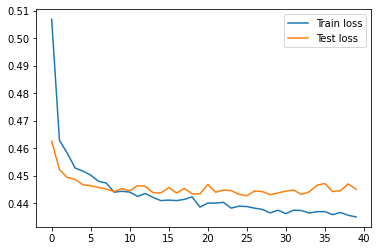

In [115]:
# train and test lost respective to epoch of neural network training
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

optimal bias variance tradeoff point happens at around 10th epoch of training

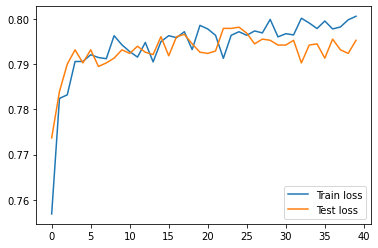

In [116]:
# train and test accuracy for each epoch
plt.plot(history.history['acc'], label='Train loss')
plt.plot(history.history['val_acc'], label='Test loss')
plt.legend();

### **Multiclass Classification**

3 Classes

In [22]:
df_3c = df1.drop(columns=['year', 'notes', 'startdate', 'enddate', 'participants_size', 'neg_response'])

In [23]:
df_3c.head()

,region,protesterviolence,participants_category,nationwide,length,demand_political_behavior_process,demand_labor_wage_dispute,demand_police_brutality,demand_social_restrictions,demand_land_farm_issue,demand_politician_removal,demand_price_inc_tax_policy,stateresponse
0,North America,0,1000-1999,1,0 days,1,1,0,0,0,0,0,ignore
1,North America,0,1000-1999,0,0 days,1,0,0,0,0,0,0,ignore
2,North America,0,100-999,0,0 days,1,0,0,0,0,0,0,ignore
3,North America,1,100-999,0,56 days,0,0,0,0,1,0,0,accomodation
4,North America,1,100-999,0,1 days,1,0,0,0,0,0,0,arrests


In [24]:
# feature 'length' to integers
df_3c['length'] = df_3c['length'].str.replace('days', '').astype(int)

In [25]:
# Dummify 'region' column
df_3c = pd.get_dummies(df_3c, columns=['region', 'participants_category'], drop_first=True)

In [26]:
df_3c['stateresponse'].value_counts()

ignore             7984
crowd dispersal    2720
arrests            1566
accomodation       1032
killings            825
beatings            637
shootings           434
Name: stateresponse, dtype: int64

In [27]:
# 3 Classes
negative = ['killings','shootings','beatings','arrests']
neutral = ['crowd dispersal','accomodation']

for i in df_3c['stateresponse'].index:
  if df_3c['stateresponse'][i] in negative:
    df_3c.at[i, 'stateresponse'] = '2'
  if df_3c['stateresponse'][i] in neutral:
    df_3c.at[i, 'stateresponse'] = '1'
  if df_3c['stateresponse'][i] == 'ignore':
    df_3c.at[i, 'stateresponse'] = '0'

In [28]:
df_3c['stateresponse'] = df_3c['stateresponse'].astype(int)

In [29]:
# final dataframe to work with
df_3c.head()

,protesterviolence,nationwide,length,demand_political_behavior_process,demand_labor_wage_dispute,demand_police_brutality,demand_social_restrictions,demand_land_farm_issue,demand_politician_removal,demand_price_inc_tax_policy,...,region_Europe,region_MENA,region_North America,region_Oceania,region_South America,participants_category_100-999,participants_category_1000-1999,participants_category_2000-4999,participants_category_5000-10000,participants_category_>10000
0,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0,56,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


X, y Train test split

In [30]:
X_3c = df_3c.drop(columns='stateresponse')
y_3c = df_3c['stateresponse']

In [31]:
X_train_3c, X_test_3c, y_train_3c, y_test_3c = train_test_split(X_3c, y_3c, random_state=42, stratify=y_3c)

StandardScaler

In [32]:
ss = StandardScaler()

Xs_train_3c = ss.fit_transform(X_train_3c)
Xs_test_3c = ss.transform(X_test_3c)

Network Topology for Binary Classification

In [33]:
Xs_train_3c.shape[1]

22

In [36]:
model_3c = Sequential()
model_3c.add(Dense(15, 
                input_shape=(Xs_train_3c.shape[1],),
                activation='relu'))
model_3c.add(Dropout(0.2))
model_3c.add(Dense(10,
                activation='relu'))
model_3c.add(Dense(3,
                activation='softmax'))

In [37]:
model_3c.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [38]:
history_3c = model_3c.fit(
    Xs_train_3c, y_train_3c,
    validation_data=(Xs_test_3c, y_test_3c),
    epochs=40,
    batch_size=15,
    verbose=1)

Epoch 1/40
760/760 [==============================] - 3s 2ms/step - loss: 0.9899 - accuracy: 0.5441 - val_loss: 0.9109 - val_accuracy: 0.6021
Epoch 2/40
760/760 [==============================] - 2s 2ms/step - loss: 0.9049 - accuracy: 0.6049 - val_loss: 0.8793 - val_accuracy: 0.6255
Epoch 3/40
760/760 [==============================] - 2s 2ms/step - loss: 0.8782 - accuracy: 0.6244 - val_loss: 0.8659 - val_accuracy: 0.6242
Epoch 4/40
760/760 [==============================] - 2s 2ms/step - loss: 0.8724 - accuracy: 0.6246 - val_loss: 0.8632 - val_accuracy: 0.6224
Epoch 5/40
760/760 [==============================] - 2s 2ms/step - loss: 0.8666 - accuracy: 0.6268 - val_loss: 0.8614 - val_accuracy: 0.6239
Epoch 6/40
760/760 [==============================] - 2s 2ms/step - loss: 0.8618 - accuracy: 0.6270 - val_loss: 0.8631 - val_accuracy: 0.6242
Epoch 7/40
760/760 [==============================] - 2s 2ms/step - loss: 0.8576 - accuracy: 0.6284 - val_loss: 0.8636 - val_accuracy: 0.6234
Epoch 

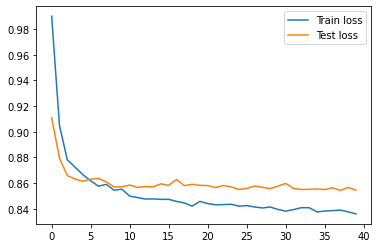

In [41]:
# loss visual
plt.plot(history_3c.history['loss'], label='Train loss')
plt.plot(history_3c.history['val_loss'], label='Test loss')
plt.legend();

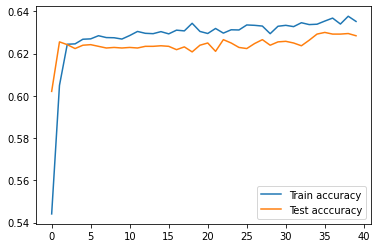

In [44]:
# accuracy visual
plt.plot(history_3c.history['accuracy'], label='Train accuracy')
plt.plot(history_3c.history['val_accuracy'], label='Test acccuracy')
plt.legend();

Multiclass

In [45]:
df_m1 = df1.drop(columns=['year', 'notes', 'startdate', 'enddate', 'participants_size', 'neg_response'])

In [46]:
df_m1.head()

,region,protesterviolence,participants_category,nationwide,length,demand_political_behavior_process,demand_labor_wage_dispute,demand_police_brutality,demand_social_restrictions,demand_land_farm_issue,demand_politician_removal,demand_price_inc_tax_policy,stateresponse
0,North America,0,1000-1999,1,0 days,1,1,0,0,0,0,0,ignore
1,North America,0,1000-1999,0,0 days,1,0,0,0,0,0,0,ignore
2,North America,0,100-999,0,0 days,1,0,0,0,0,0,0,ignore
3,North America,1,100-999,0,56 days,0,0,0,0,1,0,0,accomodation
4,North America,1,100-999,0,1 days,1,0,0,0,0,0,0,arrests


In [47]:
# feature 'length' to integers
df_m1['length'] = df_m1['length'].str.replace('days', '').astype(int)

In [48]:
# Dummify 'region' column
df_m1 = pd.get_dummies(df_m1, columns=['region', 'participants_category'], drop_first=True)

In [49]:
df_m1['stateresponse'].value_counts(normalize=True)

ignore             0.525332
crowd dispersal    0.178971
arrests            0.103040
accomodation       0.067904
killings           0.054283
beatings           0.041913
shootings          0.028556
Name: stateresponse, dtype: float64

In [51]:
df_m1['stateresponse'] = df_m1['stateresponse'].replace({'killings':6,
                                                         'shootings':5,
                                                         'beatings':4,
                                                         'arrests':3, 
                                                         'crowd dispersal':2,
                                                         'accomodation':1, 
                                                         'ignore':0
                                                         })

In [52]:
df_m1['stateresponse'].value_counts(normalize=True)

0    0.525332
2    0.178971
3    0.103040
1    0.067904
6    0.054283
4    0.041913
5    0.028556
Name: stateresponse, dtype: float64

X, y Train test split

In [53]:
X_m1 = df_m1.drop(columns='stateresponse')
y_m1 = df_m1['stateresponse']

In [54]:
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_m1, y_m1, random_state=42, stratify=y_m1)

StandardScaler

In [55]:
ss = StandardScaler()

Xs_train_m1 = ss.fit_transform(X_train_m1)
Xs_test_m1 = ss.transform(X_test_m1)

Network Topology for Binary Classification

In [56]:
Xs_train_m1.shape[1]

22

In [58]:
model_m1 = Sequential()
model_m1.add(Dense(15, 
                   input_shape=(Xs_train_m1.shape[1],),
                   activation='relu'))
model_m1.add(Dropout(0.2))
model_m1.add(Dense(10,
                   activation='relu'))
model_m1.add(Dense(7,
                   activation='softmax'))

In [59]:
model_m1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [60]:
history_m1 = model_m1.fit(
    Xs_train_m1, y_train_m1,
    validation_data=(Xs_test_m1, y_test_m1),
    epochs=40,
    batch_size=15,
    verbose=1)

Epoch 1/40
760/760 [==============================] - 5s 5ms/step - loss: 1.4895 - accuracy: 0.5119 - val_loss: 1.3302 - val_accuracy: 0.5437
Epoch 2/40
760/760 [==============================] - 3s 4ms/step - loss: 1.3199 - accuracy: 0.5601 - val_loss: 1.2727 - val_accuracy: 0.5818
Epoch 3/40
760/760 [==============================] - 3s 3ms/step - loss: 1.2812 - accuracy: 0.5779 - val_loss: 1.2563 - val_accuracy: 0.5850
Epoch 4/40
760/760 [==============================] - 3s 4ms/step - loss: 1.2663 - accuracy: 0.5786 - val_loss: 1.2495 - val_accuracy: 0.5842
Epoch 5/40
760/760 [==============================] - 4s 5ms/step - loss: 1.2600 - accuracy: 0.5833 - val_loss: 1.2443 - val_accuracy: 0.5837
Epoch 6/40
760/760 [==============================] - 3s 4ms/step - loss: 1.2521 - accuracy: 0.5826 - val_loss: 1.2392 - val_accuracy: 0.5824
Epoch 7/40
760/760 [==============================] - 3s 4ms/step - loss: 1.2538 - accuracy: 0.5827 - val_loss: 1.2371 - val_accuracy: 0.5821
Epoch 

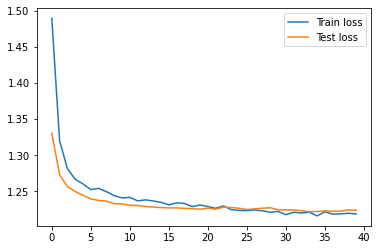

In [61]:
plt.plot(history_m1.history['loss'], label='Train loss')
plt.plot(history_m1.history['val_loss'], label='Test loss')
plt.legend();

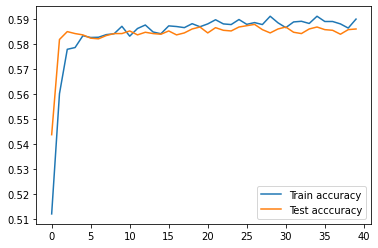

In [62]:
plt.plot(history_m1.history['accuracy'], label='Train accuracy')
plt.plot(history_m1.history['val_accuracy'], label='Test acccuracy')
plt.legend();

Multi w/o 'ignore'

In [63]:
df_m2 = df1.drop(columns=['year', 'notes', 'startdate', 'enddate', 'participants_size', 'neg_response'])

In [65]:
df_m2.head()

,region,protesterviolence,participants_category,nationwide,length,demand_political_behavior_process,demand_labor_wage_dispute,demand_police_brutality,demand_social_restrictions,demand_land_farm_issue,demand_politician_removal,demand_price_inc_tax_policy,stateresponse
0,North America,0,1000-1999,1,0 days,1,1,0,0,0,0,0,ignore
1,North America,0,1000-1999,0,0 days,1,0,0,0,0,0,0,ignore
2,North America,0,100-999,0,0 days,1,0,0,0,0,0,0,ignore
3,North America,1,100-999,0,56 days,0,0,0,0,1,0,0,accomodation
4,North America,1,100-999,0,1 days,1,0,0,0,0,0,0,arrests


In [66]:
# feature 'length' to integers
df_m2['length'] = df_m2['length'].str.replace('days', '').astype(int)

In [67]:
# Dummify 'region' column
df_m2 = pd.get_dummies(df_m2, columns=['region', 'participants_category'], drop_first=True)

In [68]:
df_m2['stateresponse'].value_counts(normalize=True)

ignore             0.525332
crowd dispersal    0.178971
arrests            0.103040
accomodation       0.067904
killings           0.054283
beatings           0.041913
shootings          0.028556
Name: stateresponse, dtype: float64

In [69]:
df_m2 = df_m2[df_m2['stateresponse'] != 'ignore']

In [70]:
df_m2['stateresponse'].value_counts()

crowd dispersal    2720
arrests            1566
accomodation       1032
killings            825
beatings            637
shootings           434
Name: stateresponse, dtype: int64

In [136]:
df_m2.shape

(7214, 23)

In [71]:
df_m2['stateresponse'] = df_m2['stateresponse'].replace({'killings':5,
                                                         'shootings':4,
                                                         'beatings':3,
                                                         'arrests':2, 
                                                         'crowd dispersal':1,
                                                         'accomodation':0
                                                               })

In [72]:
df_m2['stateresponse'].value_counts(normalize=True)

1    0.377045
2    0.217078
0    0.143055
5    0.114361
3    0.088301
4    0.060161
Name: stateresponse, dtype: float64

X, y Train test split

In [90]:
X_m2 = df_m2.drop(columns='stateresponse')
y_m2 = df_m2['stateresponse']

In [91]:
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y_m2, random_state=42, stratify=y_m2)

StandardScaler

In [92]:
ss = StandardScaler()

Xs_train_m2 = ss.fit_transform(X_train_m2)
Xs_test_m2 = ss.transform(X_test_m2)

Network Topology for Binary Classification

In [93]:
Xs_train_m2.shape[1]

22

In [94]:
model_m2 = Sequential()
model_m2.add(Dense(15, 
                   input_shape=(Xs_train_m2.shape[1],),
                   activation='relu'))
model_m2.add(Dropout(0.2))
model_m2.add(Dense(10,
                   activation='relu'))
model_m2.add(Dense(6,
                   activation='softmax'))

In [95]:
model_m2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [96]:
history_m2 = model_m2.fit(
    Xs_train_m2, y_train_m2,
    validation_data=(Xs_test_m2, y_test_m2),
    epochs=40,
    batch_size=15,
    verbose=1)

Epoch 1/40
361/361 [==============================] - 1s 3ms/step - loss: 1.7567 - accuracy: 0.3107 - val_loss: 1.6345 - val_accuracy: 0.3720
Epoch 2/40
361/361 [==============================] - 1s 2ms/step - loss: 1.6160 - accuracy: 0.3654 - val_loss: 1.5842 - val_accuracy: 0.3758
Epoch 3/40
361/361 [==============================] - 1s 2ms/step - loss: 1.5795 - accuracy: 0.3732 - val_loss: 1.5477 - val_accuracy: 0.3836
Epoch 4/40
361/361 [==============================] - 1s 2ms/step - loss: 1.5409 - accuracy: 0.3893 - val_loss: 1.5143 - val_accuracy: 0.3947
Epoch 5/40
361/361 [==============================] - 1s 2ms/step - loss: 1.5187 - accuracy: 0.3884 - val_loss: 1.4898 - val_accuracy: 0.4041
Epoch 6/40
361/361 [==============================] - 1s 2ms/step - loss: 1.4983 - accuracy: 0.3978 - val_loss: 1.4704 - val_accuracy: 0.3975
Epoch 7/40
361/361 [==============================] - 1s 2ms/step - loss: 1.4909 - accuracy: 0.3950 - val_loss: 1.4663 - val_accuracy: 0.4019
Epoch 

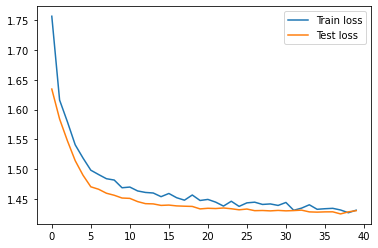

In [97]:
plt.plot(history_m2.history['loss'], label='Train loss')
plt.plot(history_m2.history['val_loss'], label='Test loss')
plt.legend();

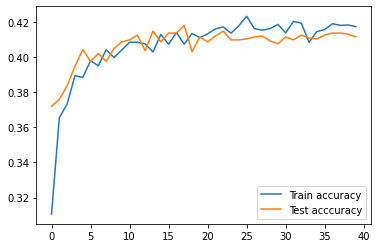

In [98]:
plt.plot(history_m2.history['accuracy'], label='Train accuracy')
plt.plot(history_m2.history['val_accuracy'], label='Test acccuracy')
plt.legend();

evaluation

In [117]:
trainpreds_2c = model_2c.predict(Xs_train_2c)
trainpreds_2c = np.argmax(trainpreds_2c, axis=1)

trainpreds_3c = model_3c.predict(Xs_train_3c)
trainpreds_3c = np.argmax(trainpreds_3c, axis=1)

trainpreds_m1 = model_m1.predict(Xs_train_m1)
trainpreds_m1 = np.argmax(trainpreds_m1, axis=1)

trainpreds_m2 = model_m2.predict(Xs_train_m2)
trainpreds_m2 = np.argmax(trainpreds_m2, axis=1)

In [116]:
testpreds_2c = model_2c.predict(Xs_test_2c)
testpreds_2c = np.argmax(testpreds_2c, axis=1)

testpreds_3c = model_3c.predict(Xs_test_3c)
testpreds_3c = np.argmax(testpreds_3c, axis=1)

testpreds_m1 = model_m1.predict(Xs_test_m1)
testpreds_m1 = np.argmax(testpreds_m1, axis=1)

testpreds_m2 = model_m2.predict(Xs_test_m2)
testpreds_m2 = np.argmax(testpreds_m2, axis=1)

In [118]:
model_2c

In [123]:
df_dict = {}

modelnames = ['2 classes', '3 classes', 'multi w/ ignore', 'multi w/o ignore']
models = [model_2c, model_3c, model_m1, model_m2]
y_trains = [y_train_2c, y_train_3c, y_train_m1, y_train_m2]
y_tests = [y_test_2c, y_test_3c, y_test_m1, y_test_m2]
trainpreds = [trainpreds_2c, trainpreds_3c, trainpreds_m1, trainpreds_m2]
testpreds = [testpreds_2c, testpreds_3c, testpreds_m1, testpreds_m2]

for i in range(0,4):
  accuracy_scores = {}
  accuracy_scores['models'] = modelnames[i]
  accuracy_scores['train_acc'] = accuracy_score(y_trains[i], trainpreds[i])
  accuracy_scores['test_acc'] = accuracy_score(y_tests[i], testpreds[i])

  df_dict[i] = accuracy_scores

In [130]:
scores = pd.DataFrame(df_dict).T

In [132]:
scores = scores.set_index('models')

In [133]:
scores

,train_acc,test_acc
models,,
2 classes,0.772241,0.772105
3 classes,0.638796,0.628421
multi w/ ignore,0.593876,0.586053
multi w/o ignore,0.43549,0.411308


Overall, neural network variance is low. Compared to the other deep learning models, neural network deep learning has accuracy comparable to that of XGBoost, which is the highest performing model in all cases.

Whichever model used, attempting to work with smaller dataset without 'ignore' response yields very low accuracy. This is likely due to the fact that almost half of the whole dataset is labeled 'ignore'. Such imbalance of data sets us off with a baseline model that already has a pretty high accuracy score. Also, removing the rows with the 'ignore' lable leaves us only with about 8000 rows to work with, which is much less than the ideal amount of data required for the deep learning model. 